<a href="https://colab.research.google.com/github/AkihiroYamanishi/sample/blob/main/003_2opt%E5%B7%A1%E5%9B%9E%E3%82%BB%E3%83%BC%E3%83%AB%E3%82%B9%E3%83%9E%E3%83%B3%E5%95%8F%E9%A1%8C_pulp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pulp
import itertools

from scipy.spatial import distance_matrix
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import pulp

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/santa2022/data/image.csv")

In [ ]:
df

,x,y,r,g,b
0,-128,128,0.600000,0.619608,0.654902
1,-127,128,0.717647,0.741176,0.792157
2,-126,128,0.709804,0.733333,0.780392
3,-125,128,0.709804,0.733333,0.780392
4,-124,128,0.709804,0.737255,0.784314
...,...,...,...,...,...
66044,124,-128,0.427451,0.596078,0.870588
66045,125,-128,0.427451,0.596078,0.870588
66046,126,-128,0.427451,0.596078,0.870588
66047,127,-128,0.427451,0.600000,0.878431


In [ ]:
# define TSP
#インデックスの最後の数＋１をn_pointに設定すること
n_point = 66049

#df = pd.DataFrame({
#    'x': np.random.randint(0, 100, n_point),
#    'y': np.random.randint(0, 100, n_point),
#})
#df.iloc[0]['x'] = 0
#df.iloc[0]['y'] = 0

In [ ]:
df = df.head(n_point)
df

,x,y,r,g,b
0,-128,128,0.600000,0.619608,0.654902
1,-127,128,0.717647,0.741176,0.792157
2,-126,128,0.709804,0.733333,0.780392
3,-125,128,0.709804,0.733333,0.780392
4,-124,128,0.709804,0.737255,0.784314
...,...,...,...,...,...
66044,124,-128,0.427451,0.596078,0.870588
66045,125,-128,0.427451,0.596078,0.870588
66046,126,-128,0.427451,0.596078,0.870588
66047,127,-128,0.427451,0.600000,0.878431


In [ ]:
#グラフ変域と値域
#x_min = -130
#x_max = 130
#y_min = -130
#y_max = 130

# check TSP state
#plt.figure(figsize=(5, 5))
# draw problem state
#for i, row in df.iterrows():
#    if i == 0:
#        plt.scatter(row['x'], row['y'], c='r')
#        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
#    else:
#        plt.scatter(row['x'], row['y'], c='black')
#        plt.text(row['x'] + 1, row['y'] + 1, f'{i}')

#plt.xlim([-128, 128])
#plt.ylim([-128, 128])
#plt.xlim([x_min, x_max])
#plt.ylim([y_min, y_max])
#plt.title('points: id')
#plt.show()

In [ ]:
#pandasからシリーズに変換
x = df["x"].values.astype(np.float32)
y = df["y"].values.astype(np.float32)
r = df["r"].values.astype(np.float32)
g = df["g"].values.astype(np.float32)
b = df["b"].values.astype(np.float32)
#x.reshape(-1,1)

In [ ]:
# get distance matrix
#df["x"].reshape(-1.1)

#D = np.sqrt((x.reshape(-1,1)-x)**2+(y.reshape(-1,1)-y)**2)+abs(r.reshape(-1,1)-r)+abs(g.reshape(-1,1)-g)+abs(b.reshape(-1,1)-b)

#D_ = np.sqrt((x.reshape(-1,1)-x)**10+(y.reshape(-1,1)-y)**2)+abs(r.reshape(-1,1)-r)+abs(g.reshape(-1,1)-g)+abs(b.reshape(-1,1)-b)
#distances = pd.DataFrame(distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values), index=df.index, columns=df.index).values

#len(D)

#fig, ax = plt.subplots(figsize=(8, 7))
#sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
#plt.title('distance matrix')
#plt.show()

2-opt法（初期値はgreedyで実行）

In [ ]:
#目的関数
distance = 0
#インデックス初期値（スタート地点のインデックス）
temp = 0
#temp_kouho = 0
routes_greedy = []
kinshi_index = []

while len(routes_greedy) <= n_point-2:
#while len(routes_greedy) <= 4:
  kinshi_index.append(temp)
  distance_min = 100000000000000
  for i in range(n_point):
   #print("-----------------------------------------------------------------"+str(i))
    if i not in kinshi_index:
      D = np.sqrt((x[temp]-x[i])**2+(y[temp]-y[i])**2)+abs(r[temp]-r[i])+abs(g[temp]-g[i])+abs(b[temp]-b[i])
      if distance_min >= D:
        distance_min = D
        temp_kouho = i
        #やっていいかわからないけど時間短縮のため、距離がある程度ちかければbreak
        if distance_min <= 2:
          break
  routes_greedy.append((temp, temp_kouho))
  print("-----------------------------------------------------------------"+str(len(routes_greedy)))
  print(D)
  #距離の計算
  distance += distance_min
  temp =temp_kouho
#ルートは最後は自然にきまるのでルートを追加するだけ
routes_greedy.append((temp,0))
distance_min = np.sqrt((x[temp]-x[0])**2+(y[temp]-y[0])**2)+abs(r[temp]-r[0])+abs(g[temp]-g[0])+abs(b[temp]-b[0])
distance += distance_min

print(routes_greedy)

ストリーミング出力は最後の 5000 行に切り捨てられました。
-----------------------------------------------------------------8696
1.0627450942993164
-----------------------------------------------------------------8697
1.5161743406094843
-----------------------------------------------------------------8698
1.0549019575119019
-----------------------------------------------------------------8699
1.1058823466300964
-----------------------------------------------------------------8700
1.4142135623730951
-----------------------------------------------------------------8701
1.0
-----------------------------------------------------------------8702
1.0
-----------------------------------------------------------------8703
1.425978267554217
-----------------------------------------------------------------8704
1.0078431367874146
-----------------------------------------------------------------8705
1.0
-----------------------------------------------------------------8706
1.0039215683937073
-----------------------------------

KeyboardInterrupt: ignored

In [ ]:
print(distance)

In [ ]:
import csv
routes_003 = pd.DataFrame(routes_greedy)
routes_003.to_csv('/content/drive/MyDrive/Kaggle/santa2022/data/routes_003.csv')

以下一旦不使用

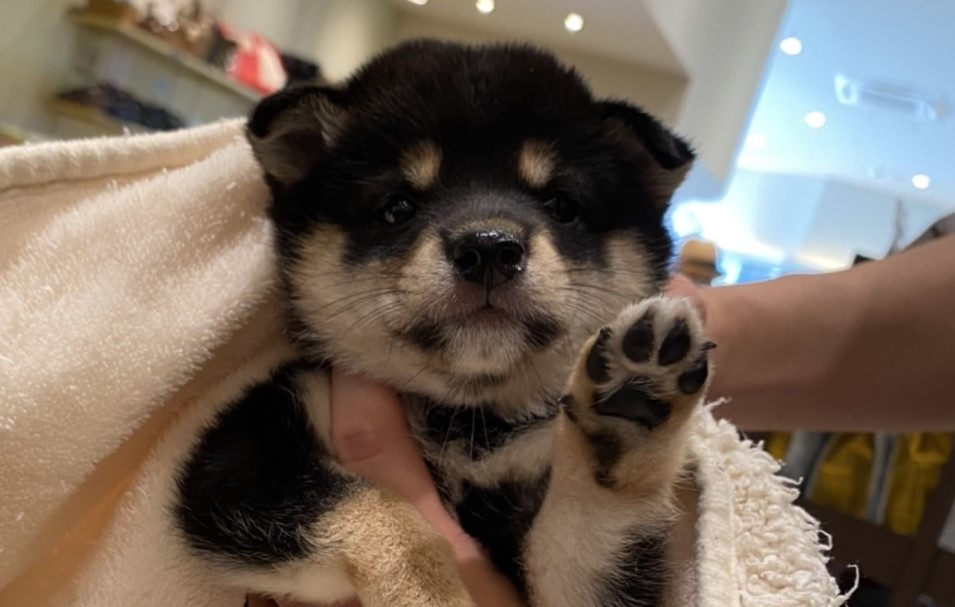

NameError: ignored

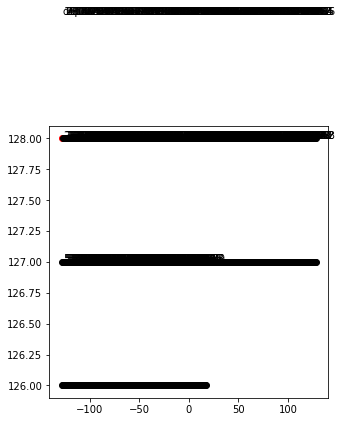

In [ ]:
# check TSP problem and optimized route
plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}')

plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('points: id')

# draw optimal route
#routes = [(i, j) for i in range(n_point) for j in range(n_point) if route.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes_greedy:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
plt.show()

厳密解を求める方法（時間がかかりすぎるため却下）

In [ ]:
# set problem
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# set valiables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# we need to keep track of the order in the tour to eliminate the possibility of subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# set objective function
problem += pulp.lpSum(D[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# set constrains
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# eliminate subtour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

(1, 'Optimal', 937.7075119018555)

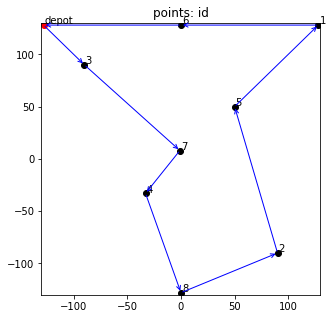

In [ ]:
# check TSP problem and optimized route
plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}')

plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('points: id')

# draw optimal route
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
plt.show()

In [ ]:
routes

[(0, 3), (1, 6), (2, 5), (3, 7), (4, 8), (5, 1), (6, 0), (7, 4), (8, 2)]